<a href="https://colab.research.google.com/github/BirasaDivine/Formative3_Group1/blob/main/Gradient_Descent_in_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient Descent in code - Part 4**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [11]:
# Initial parameters
m_initial = -1
b_initial = 1
learning_rate = 0.1

# Data points (x, y)
x_data = np.array([1, 3])
y_data = np.array([3, 6])

# Storage for tracking iterations
m_history = [m_initial]
b_history = [b_initial]
mse_history = []

# Current parameters
m = m_initial
b = b_initial

In [12]:
# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def predict(x, m, b):
    """Calculate predictions using y = mx + b"""
    return m * x + b

def calculate_mse(y_true, y_pred):
    """Calculate Mean Squared Error"""
    return np.mean((y_pred - y_true) ** 2)

def calculate_gradients(x, y_true, y_pred):
    """
    Calculate gradients for m and b

    ∂MSE/∂m = (2/n) * Σ[(ŷᵢ - yᵢ) * xᵢ]
    ∂MSE/∂b = (2/n) * Σ[(ŷᵢ - yᵢ)]
    """
    n = len(x)
    errors = y_pred - y_true

    # Gradient for m
    grad_m = (2 / n) * np.sum(errors * x)

    # Gradient for b
    grad_b = (2 / n) * np.sum(errors)

    return grad_m, grad_b

def update_parameters(m, b, grad_m, grad_b, learning_rate):
    """Update parameters using gradient descent"""
    m_new = m - learning_rate * grad_m
    b_new = b - learning_rate * grad_b
    return m_new, b_new

In [13]:
# ============================================================================
# GRADIENT DESCENT - 3 ITERATIONS
# ============================================================================

print("=" * 70)
print("GRADIENT DESCENT - STEP BY STEP")
print("=" * 70)
print(f"\nInitial Parameters:")
print(f"m = {m}, b = {b}")
print(f"Learning rate (α) = {learning_rate}")
print(f"Data points: {list(zip(x_data, y_data))}\n")

# Number of iterations (same as your manual calculation)
n_iterations = 3

for iteration in range(1, n_iterations + 1):
    print(f"\n{'=' * 70}")
    print(f"ITERATION {iteration}")
    print(f"{'=' * 70}")

    # Step 1: Calculate predictions
    y_pred = predict(x_data, m, b)
    print(f"\nStep 1: Calculate Predictions")
    print(f"Current parameters: m = {m:.4f}, b = {b:.4f}")
    for i in range(len(x_data)):
        print(f"  Point {i+1}: ŷ = {m:.4f} × {x_data[i]} + {b:.4f} = {y_pred[i]:.4f}")

    # Step 2: Calculate errors
    errors = y_pred - y_data
    print(f"\nStep 2: Calculate Errors")
    for i in range(len(x_data)):
        print(f"  Error {i+1}: {y_pred[i]:.4f} - {y_data[i]} = {errors[i]:.4f}")

    # Step 3: Calculate MSE
    mse = calculate_mse(y_data, y_pred)
    mse_history.append(mse)
    print(f"\nStep 3: Calculate MSE")
    print(f"  MSE = {mse:.4f}")

    # Step 4 & 5: Calculate gradients
    grad_m, grad_b = calculate_gradients(x_data, y_data, y_pred)
    print(f"\nStep 4 & 5: Calculate Gradients")
    print(f"  ∂MSE/∂m = {grad_m:.4f}")
    print(f"  ∂MSE/∂b = {grad_b:.4f}")

    # Step 6: Update parameters
    m_new, b_new = update_parameters(m, b, grad_m, grad_b, learning_rate)
    print(f"\nStep 6: Update Parameters")
    print(f"  m_new = {m:.4f} - {learning_rate} × {grad_m:.4f} = {m_new:.4f}")
    print(f"  b_new = {b:.4f} - {learning_rate} × {grad_b:.4f} = {b_new:.4f}")

    # Store new values
    m = m_new
    b = b_new
    m_history.append(m)
    b_history.append(b)

    print(f"\nSummary: m = {m:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

GRADIENT DESCENT - STEP BY STEP

Initial Parameters:
m = -1, b = 1
Learning rate (α) = 0.1
Data points: [(np.int64(1), np.int64(3)), (np.int64(3), np.int64(6))]


ITERATION 1

Step 1: Calculate Predictions
Current parameters: m = -1.0000, b = 1.0000
  Point 1: ŷ = -1.0000 × 1 + 1.0000 = 0.0000
  Point 2: ŷ = -1.0000 × 3 + 1.0000 = -2.0000

Step 2: Calculate Errors
  Error 1: 0.0000 - 3 = -3.0000
  Error 2: -2.0000 - 6 = -8.0000

Step 3: Calculate MSE
  MSE = 36.5000

Step 4 & 5: Calculate Gradients
  ∂MSE/∂m = -27.0000
  ∂MSE/∂b = -11.0000

Step 6: Update Parameters
  m_new = -1.0000 - 0.1 × -27.0000 = 1.7000
  b_new = 1.0000 - 0.1 × -11.0000 = 2.1000

Summary: m = 1.7000, b = 2.1000, MSE = 36.5000

ITERATION 2

Step 1: Calculate Predictions
Current parameters: m = 1.7000, b = 2.1000
  Point 1: ŷ = 1.7000 × 1 + 2.1000 = 3.8000
  Point 2: ŷ = 1.7000 × 3 + 2.1000 = 7.2000

Step 2: Calculate Errors
  Error 1: 3.8000 - 3 = 0.8000
  Error 2: 7.2000 - 6 = 1.2000

Step 3: Calculate MSE
  MSE 

In [14]:
print(f"\n{'=' * 70}")
print("FINAL RESULTS")
print(f"{'=' * 70}")
print(f"\nFinal Parameters after {n_iterations} iterations:")
print(f"  m = {m:.4f}")
print(f"  b = {b:.4f}")

print(f"\nFinal Predictions using y = {m:.4f}x + {b:.4f}:")
final_predictions = predict(x_data, m, b)
for i in range(len(x_data)):
    print(f"  x = {x_data[i]}: ŷ = {final_predictions[i]:.4f} (actual y = {y_data[i]})")

# Calculate final MSE
final_mse = calculate_mse(y_data, final_predictions)
print(f"\nFinal MSE: {final_mse:.4f}")



FINAL RESULTS

Final Parameters after 3 iterations:
  m = 1.3400
  b = 1.9160

Final Predictions using y = 1.3400x + 1.9160:
  x = 1: ŷ = 3.2560 (actual y = 3)
  x = 3: ŷ = 5.9360 (actual y = 6)

Final MSE: 0.0348


In [15]:
# ============================================================================
# COMPARISON WITH YOUR MANUAL CALCULATIONS
# ============================================================================

print(f"\n{'=' * 70}")
print("VERIFICATION: Comparing with Your Manual Calculations")
print(f"{'=' * 70}")

your_m_values = [-1, 1.7, 1.26, 1.34]
your_b_values = [1, 2.1, 1.9, 1.916]

print("\n| Iteration | Your m | Code m | Your b | Code b | Match? |")
print("|-----------|--------|--------|--------|--------|--------|")
for i in range(len(your_m_values)):
    match = "✓" if abs(m_history[i] - your_m_values[i]) < 0.01 and abs(b_history[i] - your_b_values[i]) < 0.1 else "✗"
    if i == 0:
        print(f"| Initial   | {your_m_values[i]:6.2f} | {m_history[i]:6.4f} | {your_b_values[i]:6.2f} | {b_history[i]:6.4f} | {match:^6} |")
    else:
        print(f"| {i:9d} | {your_m_values[i]:6.2f} | {m_history[i]:6.4f} | {your_b_values[i]:6.2f} | {b_history[i]:6.4f} | {match:^6} |")



VERIFICATION: Comparing with Your Manual Calculations

| Iteration | Your m | Code m | Your b | Code b | Match? |
|-----------|--------|--------|--------|--------|--------|
| Initial   |  -1.00 | -1.0000 |   1.00 | 1.0000 |   ✓    |
|         1 |   1.70 | 1.7000 |   2.10 | 2.1000 |   ✓    |
|         2 |   1.26 | 1.2600 |   1.90 | 1.9000 |   ✓    |
|         3 |   1.34 | 1.3400 |   1.92 | 1.9160 |   ✓    |



 Plot saved as 'gradient_descent_evolution.png'


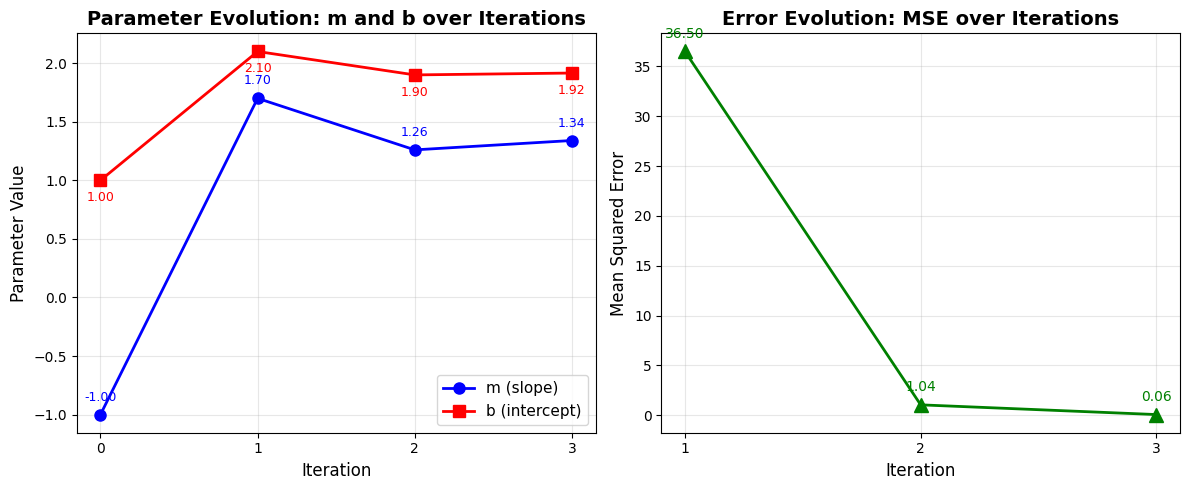

In [16]:
# ============================================================================
# VISUALIZATION 1: Parameter Evolution (m and b over iterations)
# ============================================================================

plt.figure(figsize=(12, 5))

# Plot 1: m and b evolution
plt.subplot(1, 2, 1)
iterations = range(len(m_history))
plt.plot(iterations, m_history, 'b-o', label='m (slope)', linewidth=2, markersize=8)
plt.plot(iterations, b_history, 'r-s', label='b (intercept)', linewidth=2, markersize=8)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Parameter Value', fontsize=12)
plt.title('Parameter Evolution: m and b over Iterations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(iterations)

# Add value labels on points
for i, (m_val, b_val) in enumerate(zip(m_history, b_history)):
    plt.annotate(f'{m_val:.2f}', (i, m_val), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9, color='blue')
    plt.annotate(f'{b_val:.2f}', (i, b_val), textcoords="offset points",
                xytext=(0,-15), ha='center', fontsize=9, color='red')

# Plot 2: MSE evolution
plt.subplot(1, 2, 2)
mse_iterations = range(1, len(mse_history) + 1)
plt.plot(mse_iterations, mse_history, 'g-^', linewidth=2, markersize=10)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Error Evolution: MSE over Iterations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(mse_iterations)

# Add value labels on points
for i, mse_val in enumerate(mse_history):
    plt.annotate(f'{mse_val:.2f}', (i+1, mse_val), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=10, color='green')

plt.tight_layout()
plt.savefig('gradient_descent_evolution.png', dpi=300, bbox_inches='tight')
print(f"\n Plot saved as 'gradient_descent_evolution.png'")
plt.show()

✓ Plot saved as 'gradient_descent_line_fitting.png'


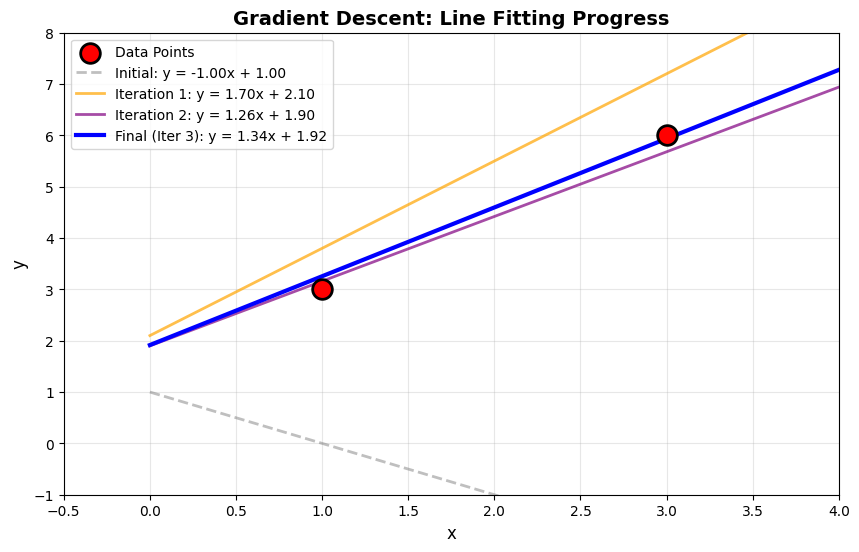

In [17]:
# ============================================================================
# VISUALIZATION 2: Best Fit Line Evolution
# ============================================================================

plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(x_data, y_data, color='red', s=200, zorder=5,
           label='Data Points', edgecolors='black', linewidths=2)

# Plot regression lines for each iteration
colors = ['gray', 'orange', 'purple', 'blue']
x_line = np.linspace(0, 4, 100)

for i in range(len(m_history)):
    y_line = m_history[i] * x_line + b_history[i]
    if i == 0:
        label = f'Initial: y = {m_history[i]:.2f}x + {b_history[i]:.2f}'
        plt.plot(x_line, y_line, color=colors[i], linestyle='--',
                linewidth=2, alpha=0.5, label=label)
    elif i == len(m_history) - 1:
        label = f'Final (Iter {i}): y = {m_history[i]:.2f}x + {b_history[i]:.2f}'
        plt.plot(x_line, y_line, color=colors[i], linewidth=3, label=label)
    else:
        label = f'Iteration {i}: y = {m_history[i]:.2f}x + {b_history[i]:.2f}'
        plt.plot(x_line, y_line, color=colors[i], linewidth=2,
                alpha=0.7, label=label)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Gradient Descent: Line Fitting Progress', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 4)
plt.ylim(-1, 8)
plt.savefig('gradient_descent_line_fitting.png', dpi=300, bbox_inches='tight')
print(f"✓ Plot saved as 'gradient_descent_line_fitting.png'")
plt.show()

